# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [44]:
%matplotlib inline
from statsmodels.sandbox.predict_functional import predict_functional
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020", "ALQ110"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [45]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.280
Date:                Mon, 05 Jul 2021   Prob (F-statistic):              0.131
Time:                        16:06:27   Log-Likelihood:                -5033.1
No. Observations:                1473   AIC:                         1.007e+04
Df Residuals:                    1471   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1093      0.596     48.871      0.000      27.941      30.278
RIDAGEYR       0.0161      0.011      1.510      0.131      -0.005       0.037
==============================================================================
Omnibus:                      263.915   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.303
Skew:                           1.083   Prob(JB):                    2.79e-108
Kurtosis:                       4.838   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

Yes, because we have a positive regression coef for the age variable.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

If I were to use an alpha=0.05 I would say no.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [46]:
regression_coef = .0091

forty_year_old_bmi = 40 * regression_coef
twenty_year_old_bmi = 20 * regression_coef
print("Difference: " + str(forty_year_old_bmi-twenty_year_old_bmi))

Difference: 0.182


__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

Roughly 1% according to our R2 value.

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [47]:
da["RIDRETH1"] = da["RIDRETH1"].replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 4: "Non-Hispanic Black", 5: "Other"})
da["RIAGENDR"] = da["RIAGENDR"].replace({1: "Male", 2: "Female"})

In [48]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR + RIDRETH1", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     23.80
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           5.55e-27
Time:                        16:06:30   Log-Likelihood:                -4965.8
No. Observations:                1473   AIC:                             9946.
Df Residuals:                    1466   BIC:                             9983.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         31.6846      0.682     46.453      0.000      30.347      33.023
RIAGENDR[T.Male]                  -1.2017      0.407     -2.949      0.003      -2.001      -0.402
RIDRETH1[T.Non-Hispanic Black]    -0.7502      0.569     -1.319      0.187      -1.866       0.366
RIDRETH1[T.Non-Hispanic White]    -0.9866      0.562     -1.755      0.080      -2.090       0.116
RIDRETH1[T.Other]                 -5.8381      0.588     -9.920      0.000      -6.992      -4.684
RIDRETH1[T.Other Hispanic]        -1.0388      0.628     -1.654      0.098      -2.271       0.193
RIDAGEYR                           0.0058      0.010      0.560      0.576      -0.015       0.026
==============================================================================
Omnibus:                      256.385   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.828
Skew:                           1.044   Prob(JB):                    1.59e-107
Kurtosis:                       4.912   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

It decreased slightly from .0091 to .0065

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

Remaned relatively unchanged moving from .006 to .005

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

In [49]:
age_model_explained_varation = .001
new_model_explained_varation = .055
print("Additional explained variation: " + str(new_model_explained_varation - age_model_explained_varation))

Additional explained variation: 0.054


__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

Since the only difference between the two subjects is age the answer is as follows:

In [50]:
age_coef = 0.0065
print("expected difference BMI: " + str(10 * age_coef))

expected difference BMI: 0.065


__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

The difference here is both gender and ethnicity, we will caclulate the difference as follows:

In [51]:
mexican_american_coef = 0
non_hispanic_black_coef = -0.4499
male_coef = -1.0226
female_coef = 0

print("expected difference BMI: " + str((mexican_american_coef + female_coef) - (non_hispanic_black_coef + male_coef)))

expected difference BMI: 1.4725


## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [52]:
df = da.sample(frac=.25).copy()

In [53]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR + RIDRETH1", data=df)
sample_result = model.fit()
sample_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     9.034
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           3.28e-09
Time:                        16:06:33   Log-Likelihood:                -1205.4
No. Observations:                 368   AIC:                             2425.
Df Residuals:                     361   BIC:                             2452.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         30.1517      1.257     23.993      0.000      27.680      32.623
RIAGENDR[T.Male]                  -0.3767      0.744     -0.506      0.613      -1.839       1.086
RIDRETH1[T.Non-Hispanic Black]    -2.0948      1.055     -1.986      0.048      -4.169      -0.021
RIDRETH1[T.Non-Hispanic White]    -0.3934      1.020     -0.386      0.700      -2.399       1.612
RIDRETH1[T.Other]                 -6.2576      1.032     -6.062      0.000      -8.288      -4.228
RIDRETH1[T.Other Hispanic]        -2.9188      1.182     -2.470      0.014      -5.243      -0.595
RIDAGEYR                           0.0264      0.019      1.370      0.171      -0.011       0.064
==============================================================================
Omnibus:                       60.723   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.606
Skew:                           0.931   Prob(JB):                     1.58e-24
Kurtosis:                       4.918   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

We can see that our regression coefficients are roughly the same, while our standard errors have become much larger, because the model is less certain of itself when using less data.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

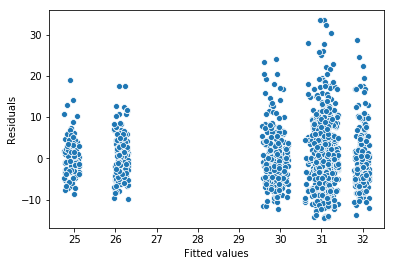

In [54]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

In [55]:
print(result.resid.var())
print(result.resid.mean())

49.660340498823686
1.0033461577603587e-14


The variance of residuals it relatively high, and the mean residual is small

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [56]:
da.columns

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'ALQ110'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'ALQ110' in data frame but not in summaries or values.
  ValueWarning)


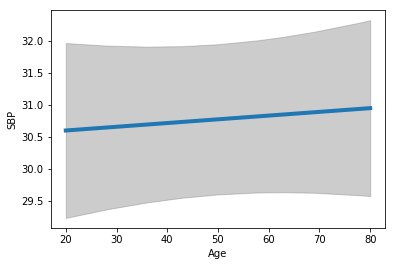

In [57]:
# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDR": "Male", "RIDRETH1": "Mexican American", "DMDEDUC2": 1, "BPXSY1": 1, "SMQ020": 1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

fig, ax = plt.subplots()
sns.lineplot(fv, pr, lw=4, ax=ax)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

SBP between 30-31 look to be within the confidence bounds


**Q5b.** Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women. At what ages do these intervals not overlap?

/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'ALQ110' in data frame but not in summaries or values.
  ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'ALQ110' in data frame but not in summaries or values.
  ValueWarning)


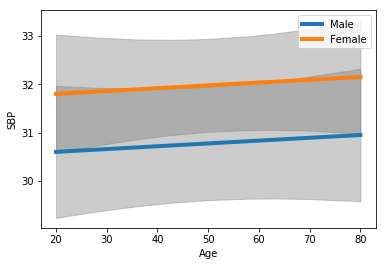

In [58]:
# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
male_values = {"RIAGENDR": "Male", "RIDRETH1": "Mexican American", "DMDEDUC2": 1, "BPXSY1": 1, "SMQ020": 1}
female_values = {"RIAGENDR": "Female", "RIDRETH1": "Mexican American", "DMDEDUC2": 1, "BPXSY1": 1, "SMQ020": 1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr1, cb1, fv1 = predict_functional(result, "RIDAGEYR",
                values=male_values, ci_method="simultaneous")

pr2, cb2, fv2 = predict_functional(result, "RIDAGEYR",
                values=female_values, ci_method="simultaneous")

fig, ax = plt.subplots()
sns.lineplot(fv1, pr1, lw=4, ax=ax, label="Male")
sns.lineplot(fv2, pr2, lw=4, ax=ax, label="Female")
ax.fill_between(fv1, cb1[:, 0], cb1[:, 1], color='grey', alpha=0.4)
ax.fill_between(fv2, cb2[:, 0], cb2[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")
plt.legend()
plt.show()

According to the plot above it looks like there is no break in overlap of the intervals of Mexican American Men and Mexican American Women.

# Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 BMXBMI   No. Observations:                 1473
Model:                            GLM   Df Residuals:                     1466
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          49.864
Method:                          IRLS   Log-Likelihood:                -4965.8
Date:                Mon, 05 Jul 2021   Deviance:                       73100.
Time:                        16:22:07   Pearson chi2:                 7.31e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         31.6846      0.682     46.453      0.000      30.348     

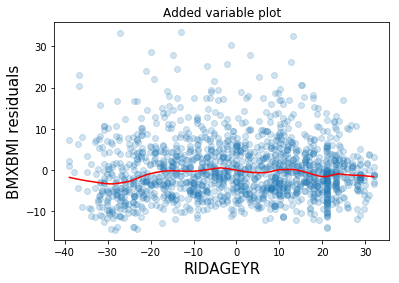

In [85]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR + RIDRETH1", data=da)
result = model.fit()
print(result.summary())

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)


**Q6a.** What is your interpretation of the added variable plot?

There is a non linear relationship between BMI and Age where young people and older people have smaller BMIs when controlling for Gener and Enthnicity than those who are at the middle of our age range in this data.

# Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the ALQ110 variable in NHANES. Calculate the marginal probability, odds, and log odds of this variable for women and for men. Then calculate the odds ratio for females relative to males.

In [66]:
da["ALCOHOL"] = da['ALQ110'].replace({2: 0, 7: np.nan, 9: np.nan})

In [105]:
c = pd.crosstab(da['RIAGENDR'], da['ALCOHOL']).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:,1] / c.loc[:,0]
print(c)
print('\n')

model = sm.GLM.from_formula("ALCOHOL ~ RIAGENDR", family=sm.families.Binomial(), data=da)
result = model.fit()
print(result.summary())
print('\n')

print("odds ratio")
print(c.odds.Male / c.odds.Female)
print("\n")

ALCOHOL        0.0       1.0      odds
RIAGENDR                              
Female    0.549228  0.450772  0.820738
Male      0.537037  0.462963  0.862069


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ALCOHOL   No. Observations:                 1468
Model:                            GLM   Df Residuals:                     1466
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1011.3
Date:                Mon, 05 Jul 2021   Deviance:                       2022.6
Time:                        16:49:01   Pearson chi2:                 1.47e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

**Q7a.** Based on the log odds alone, do more than 50% of women drink alcohol?

No because the log odd is negative.

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

There is a rather large p-value for males, which indicated that Gender is not the best predictor of alcohol use.

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [94]:
c["logodds"] = np.log(c.odds)
print(c)

ALCOHOL        0.0       1.0      odds   logodds
RIAGENDR                                        
Female    0.549228  0.450772  0.820738 -0.197551
Male      0.537037  0.462963  0.862069 -0.148420


__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

No there is not sufficient statistical evidence to say with confidence that the drinking rate differs between males and females.

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

In [91]:
c.logodds.Male - c.logodds.Female

0.0491311713391602

Yes they match

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [95]:
# Labeled version of the education variable
da["DMDEDUC2"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege", 5: "College", 7: np.nan, 9: np.nan})

In [107]:
model = sm.GLM.from_formula("ALCOHOL ~ RIDAGEYR + RIAGENDR + DMDEDUC2", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ALCOHOL   No. Observations:                 1467
Model:                            GLM   Df Residuals:                     1460
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -987.65
Date:                Mon, 05 Jul 2021   Deviance:                       1975.3
Time:                        16:51:50   Pearson chi2:                 1.47e+03
No. Iterations:                     4   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.4849      0.193     -2.519      0.012      -0.862      -0.108
RIAGENDR[T.Male]            0.0313      0.117      0.267      0.789      -0.198       0.261
DMDEDUC2[T.HS]             -0.0278      0.163     -0.170      0.865      -0.348       0.292
DMDEDUC2[T.SomeCollege]     0.1147      0.152      0.756      0.450      -0.183       0.412
DMDEDUC2[T.lt9]            -0.8479      0.176     -4.814      0.000      -1.193      -0.503
DMDEDUC2[T.x9_11]          -0.4496      0.190     -2.367      0.018      -0.822      -0.077
RIDAGEYR                    0.0090      0.003      2.975      0.003       0.003       0.015
===========================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

That depends on what alpha we areusing to assess statistical significance, if we use an alpha of 0.05 then only age would be significant.

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

In [108]:
y_intercept = -0.4849
RIDAGEYR_intercept = 0.0090
odds = np.exp(y_intercept + (RIDAGEYR_intercept * 50))
print(odds)

0.9657019816273802


The odds are slightly less than 1, meaning a little less than 50% probability.

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

In [109]:
COLLEGE_intercept = 0
HS_intercept = -0.0278
odds_ratio = np.exp(COLLEGE_intercept + HS_intercept)
print(odds_ratio)

0.9725828639236711


High school students are less likely to drink than college students.

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

Yes the intercept went from .0491 to .0313

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

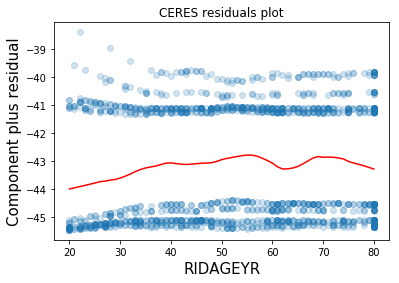

In [110]:
fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

Yes we can see that drinking rates increase with agr up until ~55 years old